# Mini Project 2: Data Exploration and Engineering 
## Objective
- The objective of this assignment is to enable you to build and train skills in data exploration and analysis
by applying methods from statistics.


## Tasks
## Load the data

- 1. Load wine data from the two source files winequality-red.xlsx and winequalitywhite.xslx, which you can find in the Data Science repository on Github:
https://github.com/datsoftlyngby/dat2024spring-bi/tree/main/data.

In [1]:
import pandas as pd

def load_file(file_path, header=None, skiprows=1):
    df = pd.read_excel(file_path, header=header, skiprows=skiprows)
    print(df.head())  # Display the first few rows of the DataFrame
    print('-----------------------------------------------------------------------------')
    return df
    

In [2]:
dataRed = load_file('./data/winequality-red.xlsx')
dataWhite = load_file('./data/winequality-white.xlsx')

              0                 1            2               3          4   \
0  fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
1            7.4               0.7            0             1.9      0.076   
2            7.8              0.88            0             2.6      0.098   
3            7.8              0.76         0.04             2.3      0.092   
4           11.2              0.28         0.56             1.9      0.075   

                    5                     6        7     8          9   \
0  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
1                   11                    34   0.9978  3.51       0.56   
2                   25                    67   0.9968   3.2       0.68   
3                   15                    54    0.997  3.26       0.65   
4                   17                    60    0.998  3.16       0.58   

        10       11  
0  alcohol  quality  
1      9.4        5  
2      9.8        5 

- 2. Clean the data in both files.

In [3]:
#Find out if there are any blank entries
dataRed.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [4]:
#Find out if there are any blank entries
dataWhite.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [5]:
columns_list = dataRed.columns.tolist()
print(columns_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [6]:
column_names = dataRed.iloc[0]  # Get the first row as column names
dataRed = dataRed[1:]  # Remove the first row from the DataFrame

# Set the column names
dataRed.columns = column_names

# Now combined_data has its column names set based on the first row values
print(dataRed.head())

0 fixed acidity volatile acidity citric acid residual sugar chlorides  \
1           7.4              0.7           0            1.9     0.076   
2           7.8             0.88           0            2.6     0.098   
3           7.8             0.76        0.04            2.3     0.092   
4          11.2             0.28        0.56            1.9     0.075   
5           7.4              0.7           0            1.9     0.076   

0 free sulfur dioxide total sulfur dioxide density    pH sulphates alcohol  \
1                  11                   34  0.9978  3.51      0.56     9.4   
2                  25                   67  0.9968   3.2      0.68     9.8   
3                  15                   54   0.997  3.26      0.65     9.8   
4                  17                   60   0.998  3.16      0.58     9.8   
5                  11                   34  0.9978  3.51      0.56     9.4   

0 quality  
1       5  
2       5  
3       5  
4       6  
5       5  


In [7]:
column_names = dataWhite.iloc[0]  # Get the first row as column names
dataWhite = dataWhite[1:]  # Remove the first row from the DataFrame

# Set the column names
dataWhite.columns = column_names

# Now combined_data has its column names set based on the first row values
print(dataWhite.head())

0 fixed acidity volatile acidity citric acid residual sugar chlorides  \
1             7             0.27        0.36           20.7     0.045   
2           6.3              0.3        0.34            1.6     0.049   
3           8.1             0.28         0.4            6.9      0.05   
4           7.2             0.23        0.32            8.5     0.058   
5           7.2             0.23        0.32            8.5     0.058   

0 free sulfur dioxide total sulfur dioxide density    pH sulphates alcohol  \
1                  45                  170   1.001     3      0.45     8.8   
2                  14                  132   0.994   3.3      0.49     9.5   
3                  30                   97  0.9951  3.26      0.44    10.1   
4                  47                  186  0.9956  3.19       0.4     9.9   
5                  47                  186  0.9956  3.19       0.4     9.9   

0 quality  
1       6  
2       6  
3       6  
4       6  
5       6  


In [8]:
dataRed['wine_type'] = 'red'
dataWhite['wine_type'] = 'white'

In [9]:
print(dataRed.head())
print(dataWhite.head())

0 fixed acidity volatile acidity citric acid residual sugar chlorides  \
1           7.4              0.7           0            1.9     0.076   
2           7.8             0.88           0            2.6     0.098   
3           7.8             0.76        0.04            2.3     0.092   
4          11.2             0.28        0.56            1.9     0.075   
5           7.4              0.7           0            1.9     0.076   

0 free sulfur dioxide total sulfur dioxide density    pH sulphates alcohol  \
1                  11                   34  0.9978  3.51      0.56     9.4   
2                  25                   67  0.9968   3.2      0.68     9.8   
3                  15                   54   0.997  3.26      0.65     9.8   
4                  17                   60   0.998  3.16      0.58     9.8   
5                  11                   34  0.9978  3.51      0.56     9.4   

0 quality wine_type  
1       5       red  
2       5       red  
3       5       red  
4   

- 3. Aggregate the two files in one still keeping the identity of each wine type - “red” or “white”

In [10]:
combined_data = pd.concat([dataRed, dataWhite], ignore_index=True)

In [11]:
combined_data.sample

<bound method NDFrame.sample of 0    fixed acidity volatile acidity citric acid residual sugar chlorides  \
0              7.4              0.7           0            1.9     0.076   
1              7.8             0.88           0            2.6     0.098   
2              7.8             0.76        0.04            2.3     0.092   
3             11.2             0.28        0.56            1.9     0.075   
4              7.4              0.7           0            1.9     0.076   
...            ...              ...         ...            ...       ...   
6492           6.2             0.21        0.29            1.6     0.039   
6493           6.6             0.32        0.36              8     0.047   
6494           6.5             0.24        0.19            1.2     0.041   
6495           5.5             0.29         0.3            1.1     0.022   
6496             6             0.21        0.38            0.8      0.02   

0    free sulfur dioxide total sulfur dioxide  density 

## Explore the data

- 4. Explore the features of the original and the new files:
-     a. number of rows and columns
-     b. type of data in each column

In [12]:
# Count number of rows and columns
num_rows_combined, num_cols_combined = combined_data.shape

print(f"Number of rows combined: {num_rows_combined}")
print(f"Number of columns combined: {num_cols_combined}")

Number of rows combined: 6497
Number of columns combined: 13


In [13]:
# Count number of rows and columns in red
num_rows_red, num_cols_red = dataRed.shape

print(f"Number of rows for red wine: {num_rows_red}")
print(f"Number of columns for red wine: {num_cols_red}")

Number of rows for red wine: 1599
Number of columns for red wine: 13


In [14]:
# Count number of rows and columnsin white
num_rows_white, num_cols_white = dataWhite.shape

print(f"Number of rows for white wine: {num_rows_white}")
print(f"Number of columns for white wine: {num_cols_white}")

Number of rows for white wine: 4898
Number of columns for white wine: 13


In [15]:
combined_data.dtypes

0
fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
quality                 object
wine_type               object
dtype: object

In [16]:
dataRed.dtypes

0
fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
quality                 object
wine_type               object
dtype: object

In [17]:
dataWhite.dtypes

0
fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
quality                 object
wine_type               object
dtype: object

- 5. Calculate the descriptive statistics of the numeric data. Is the data normally distributed?

In [18]:
from scipy.stats import normaltest

# Convert columns to numeric
numeric_columns = combined_data.columns[:-1]  # Exclude the last column ('wine_type')
combined_data[numeric_columns] = combined_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate descriptive statistics of the numeric data
statistics = combined_data.describe()

print("Descriptive Statistics:")
print(statistics)

# Check for normal distribution using the Shapiro-Wilk test
alpha = 0.05
for column in numeric_columns:
    stat, p = normaltest(combined_data[column].dropna())
    if p > alpha:
        print(f"Data in column '{column}' is normally distributed (p = {p:.4f})")
    else:
        print(f"Data in column '{column}' is not normally distributed (p = {p:.4f})")

Descriptive Statistics:
0      fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

0        chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000      

- It seems wrong that non of the columns should be normal distributed, but maybe I can't figure it out.

## 6. Plot diagrams that visualize the differences in red and white wine samples. Use it as a support for
- answering the following questions:
- a. what exactly is shown on the diagrams?
- b. after seeing it, can you tell which type of wine has higher average quality?
- c. which type of wine has higher average level of alcohol?
- d. which one has higher average quantity of residual sugar? 

- please read the texts on the figures..!

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


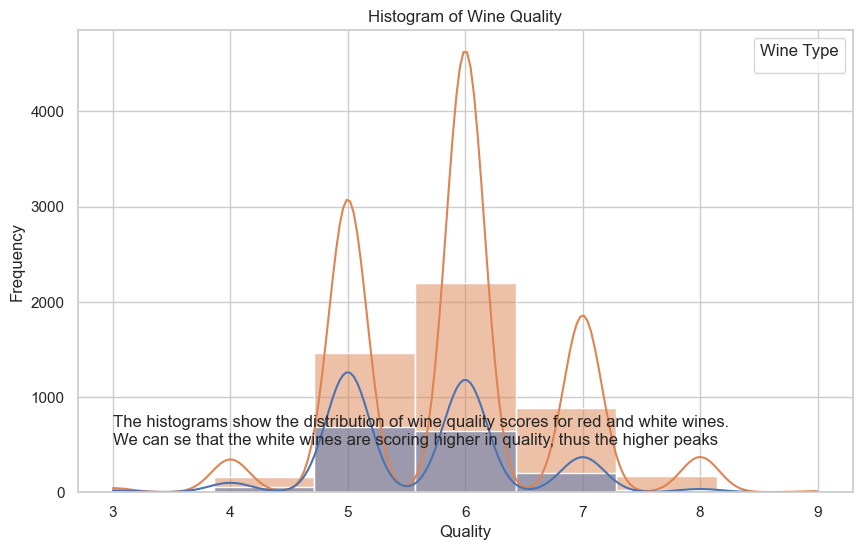

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


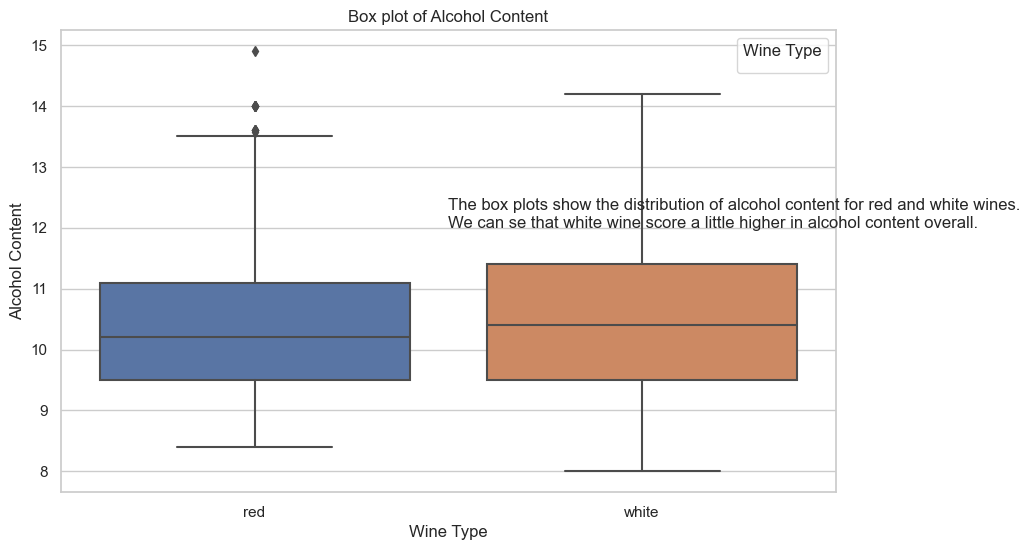

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


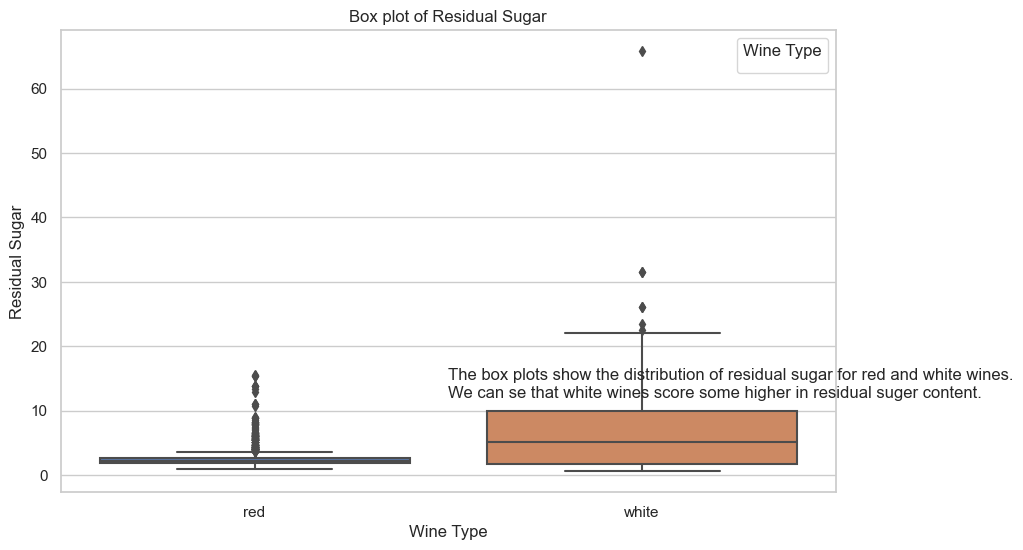

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# 1. Histograms of quality
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_data, x='quality', hue='wine_type', bins=7, alpha=0.5, kde=True)
plt.title('Histogram of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.legend(title='Wine Type')  # Add legend for wine type
plt.text(3, 500, 'The histograms show the distribution of wine quality scores for red and white wines. \nWe can se that the white wines are scoring higher in quality, thus the higher peaks')
plt.show()

# 2. Box plots of alcohol content
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='wine_type', y='alcohol')
plt.title('Box plot of Alcohol Content')
plt.xlabel('Wine Type')
plt.ylabel('Alcohol Content')
plt.legend(title='Wine Type')  # Add legend for wine type
plt.text(0.5, 12, 'The box plots show the distribution of alcohol content for red and white wines.\nWe can se that white wine score a little higher in alcohol content overall.')
plt.show()

# 3. Box plots of residual sugar
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='wine_type', y='residual sugar')
plt.title('Box plot of Residual Sugar')
plt.xlabel('Wine Type')
plt.ylabel('Residual Sugar')
plt.legend(title='Wine Type')  # Add legend for wine type
plt.text(0.5, 12, 'The box plots show the distribution of residual sugar for red and white wines.\nWe can se that white wines score some higher in residual suger content.')
plt.show()


## 7. Which other questions might be of interest for the wine consumers or distributors?

- Any of the columns/categories can really contribute to the statistics, you want to bring forward and help figure out correlation between or against the other categories. 

- Later on, we will create a correlation matrix, which makes it easy to identify significant correlations.

In [20]:
print(combined_data.columns)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object', name=0)


## 8. Split the aggregated data into five subsets by binning the attribute pH.

-  Identify the subset with the highest density? What if you split the data in ten subsets?



In [21]:
# Assuming df is your DataFrame containing the aggregated data

# Split the data into five subsets by binning the attribute pH
combined_data['pH_bin'] = pd.cut(combined_data['pH'], bins=5)

# Count the number of samples in each bin
subset_counts = combined_data['pH_bin'].value_counts()

# Identify the subset with the highest density
subset_with_highest_density = subset_counts.idxmax()
highest_density_count = subset_counts.max()

print("Subset with the highest density (5 subsets):", subset_with_highest_density)
print("Number of samples in the subset:", highest_density_count)

# If you want to split the data into ten subsets, just change the number of bins to 10
combined_data['pH_bin'] = pd.cut(combined_data['pH'], bins=10)
subset_counts = combined_data['pH_bin'].value_counts()
subset_with_highest_density = subset_counts.idxmax()
highest_density_count = subset_counts.max()

print("\nSubset with the highest density (10 subsets):", subset_with_highest_density)
print("Number of samples in the subset:", highest_density_count)

Subset with the highest density (5 subsets): (2.978, 3.236]
Number of samples in the subset: 3344

Subset with the highest density (10 subsets): (3.107, 3.236]
Number of samples in the subset: 2111


## 9. Create a heat map or a correlation matrix of all data and investigate it. 
- Can you tell which vine attribute has the biggest influence on the wine quality? Which has the lowest?
- Do you get the same results when you analyze the red and white wine data sets separately?

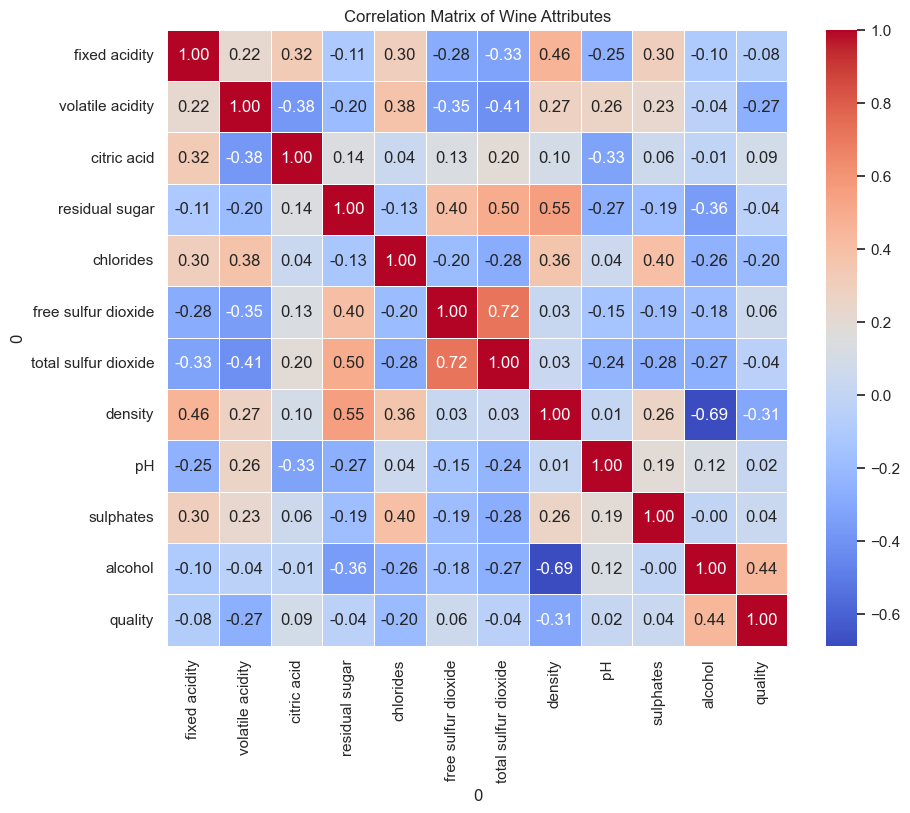

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
numeric_data = combined_data.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Wine Attributes')
plt.show()


In [23]:
print(dataRed.columns)
print(combined_data.columns)



Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object', name=0)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type', 'pH_bin'],
      dtype='object', name=0)


In [24]:
dataRed = dataRed.drop('wine_type', axis=1)


In [25]:
dataRed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
5,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,5
1596,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1597,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
1598,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [26]:
dataWhite = dataWhite.drop('wine_type', axis=1)

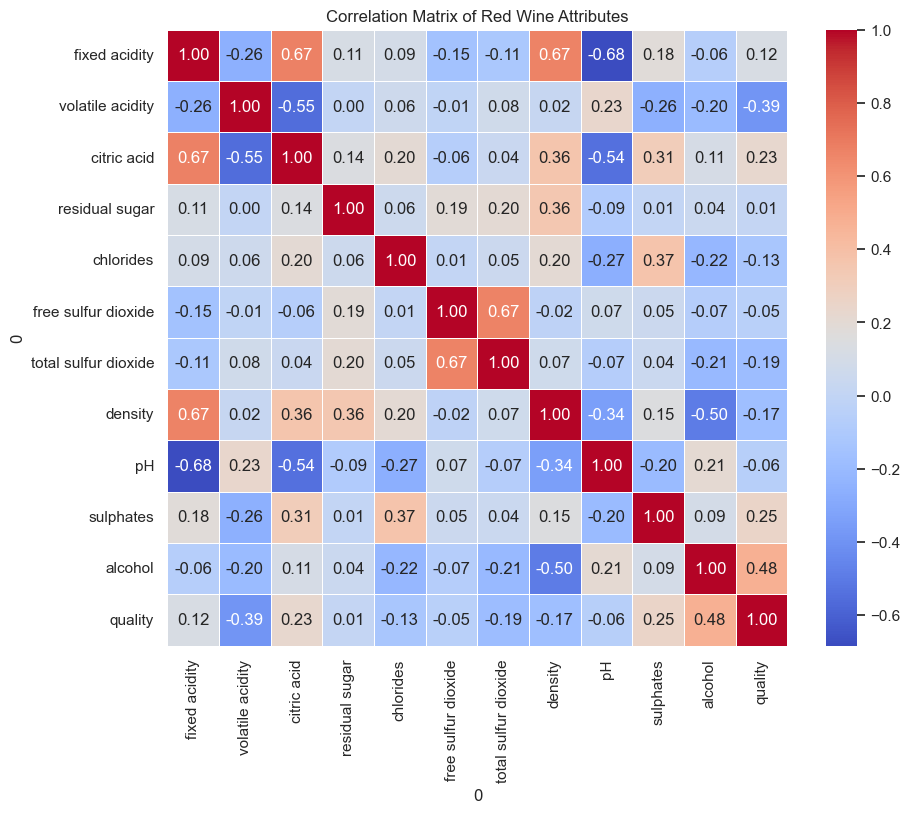

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = dataRed.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Red Wine Attributes')
plt.show()


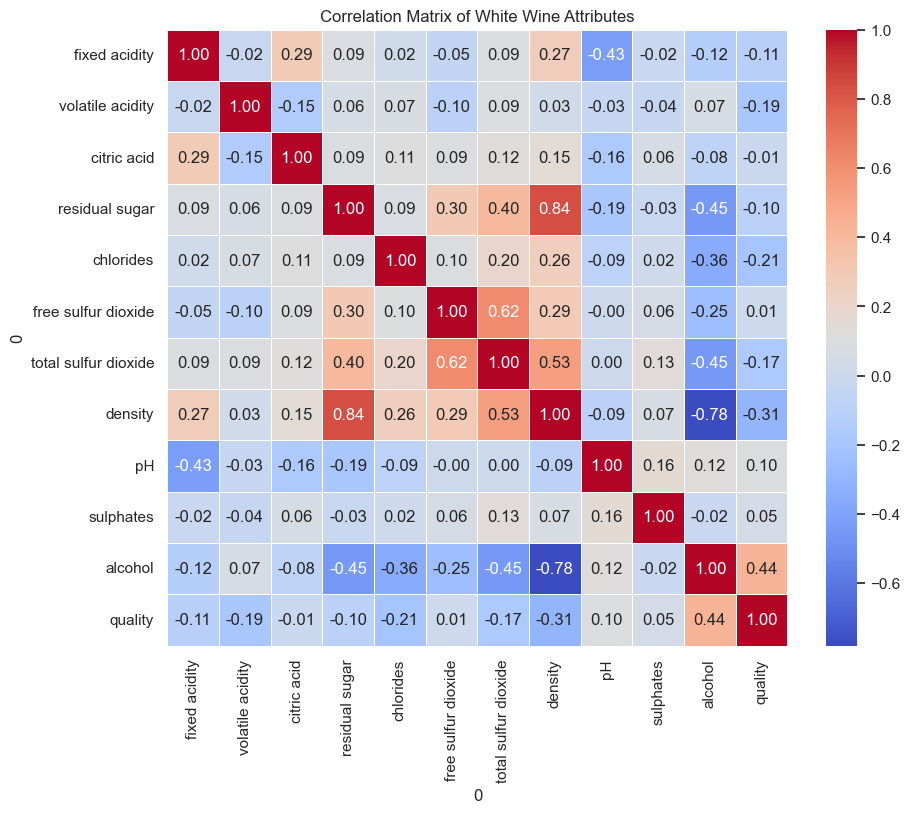

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = dataWhite.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of White Wine Attributes')
plt.show()

## No we do not get the same values
- The correlation between residual sugar and density is in white whine correlating and gives a value of 0.84
- Where as the correlation between residual sugar and density is in red whine correlating and gives a value of 0.36
- The combined data scores 0.55 in these values

This symbolizes that there can be a big difference upon how you see/visualize the datasets in groups or one by one.


